In [1]:
from qwak.qwak import QWAK
from utils.plotTools import searchProbStepsPlotting,searchProbStepsPlotting2

import networkx as nx
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
from scipy.linalg import expm
import sympy as simp
import math
from qwak.State import State
from qwak.Operator import Operator
from qwak.QuantumWalk import QuantumWalk
from qwak.ProbabilityDistribution import ProbabilityDistribution
from qwak.qwak import QWAK
import copy
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

from scipy.ndimage import gaussian_filter


In [2]:
def write_nested_list_to_file(file_path, nested_lst):
    """
    Write a nested list of elements to a text file.
    
    :param file_path: the file path where to write the nested list
    :param nested_lst: the nested list of elements to write
    """
    with open(file_path, 'w') as f:
        for lst in nested_lst:
            for item in lst:
                f.write(f"{item} ")
            f.write("\n")

def load_nested_list_from_file(file_path):
    """
    Load a nested list of float elements from a text file.
    
    :param file_path: the file path to load the nested list from
    :return: the nested list of float elements loaded from the file
    """
    nested_lst = []
    with open(file_path, 'r') as f:
        for line in f:
            lst = [float(item) for item in line.strip().split()]
            nested_lst.append(lst)
    return nested_lst

def taylor_series_approximation(n, num_terms):
    approx = 0
    for i in range(num_terms):
        approx += ((-1)**i) * (n**(-2*i-2)) / math.factorial(2*i+2)
    return approx

def taylor_series_approximation2(n, order):
    taylor_series = 0
    for i in range(order):
        taylor_series += (-1)**i * sp.binom(order, i) * (1/n)**(order - i)
    return taylor_series

def approx_1_over_n_squared(n,order):
    sum = 0
    for i in range(0, order):
        sum += 1 / (n ** (2+i))
    return sum

In [39]:
N = 100
pThresh = math.log(N,3/2)/N
print(pThresh)

t = np.pi/2 * sqrt(N)

#procurar funcao que testa se o grafo e conexo

timeList = [ x for x in np.linspace(0,t,50)]

markedElements = [(N//2,-1)]

# print(t)
probDistList = []

for p in np.linspace(pThresh/10, pThresh ,2):
    graph = nx.erdos_renyi_graph(N,p)
    if p>1:
        gamma = 1/N
    else:
        gamma = 1/(N*p)
    initCond = list(range(0,len(graph)))
    qw = QWAK(graph=graph,gamma=gamma,markedElements=markedElements,laplacian=False)
    qw.runWalk(time=t,initStateList=initCond)
    probDistList.append(copy.deepcopy(qw.getProbVec()))

# for prob in probDistList:
#     plt.plot(prob)
#     print(max(prob))

0.11357747174535147


In [40]:
N = 100
pThresh = math.log(N,3/2)/N

t = np.pi/2 * sqrt(N)
print(t)
#procurar funcao que testa se o grafo e conexo
# timeList = [ x for x in np.linspace(0,t,10)]
timeList = [ x for x in np.linspace(t-t/3,t,5)]
markedElements = [(N//2,-1)]
probDistList = []

graph = nx.erdos_renyi_graph(N,pThresh)
if pThresh>1:
    gamma = 1/N
else:
    gamma = 1/(N*pThresh)
initCond = list(range(0,len(graph)))
qw = QWAK(graph=graph,gamma=gamma,markedElements=markedElements,laplacian=False)
qw.runMultipleWalks(timeList=timeList,initStateList=initCond)

# for prob in qw.getProbVecList():
#     plt.plot(prob)
#     # print(max(prob))

15.707963267948966


In [8]:
def multiple_erdos_renyi_qwak(N,pList,timeList,numberOfWalks,markedElements):
    markedProbMatrix = []
    markedProbList = [0]*len(timeList)
    probDistList = []
    for pVal in pList:
        for i in range(numberOfWalks):
            graph = nx.erdos_renyi_graph(N,pVal)
            if pVal>1:
                gamma = 1/N
            else:
                gamma = 1/(N*pVal)
            initCond = list(range(0,len(graph)))
            qw = QWAK(graph=graph,gamma=gamma,markedElements=markedElements,laplacian=False)
            for t in timeList:
                qw.runWalk(time=t,initStateList=initCond)
                probDistList.append(copy.deepcopy(qw.getProbDist()))
            markedElementList = searchProbStepsPlotting2(qw,probDistList)
            # print(f'NWALK {i} PVAL {round(pVal,4)} : \n{markedElementList}')
            markedProbList = [x + y for x, y in zip(markedProbList, markedElementList )]
            probDistList = []
        # print(f'\nPVAL {round(pVal,4)} sum : \n{markedProbList}')
        pValMatrix.append([pVal]*len(timeList))
        timeMatrix = [timeList]*len(timeList)
        markedProbListAvg = [x/numberOfWalks for x in markedProbList]
        # print(f'PVAL {round(pVal,4)} avg : \n{markedProbListAvg}\n')
        markedProbMatrix.append(markedProbListAvg)
        markedProbList = [0]*len(timeList)

    return pValMatrix,timeMatrix,markedProbMatrix




In [60]:
N = 300
p = math.log(N,3/2)/N
print(p)

samples = 200
numberOfWalks = 20

pAux = p/(samples)
pList = np.concatenate([np.linspace(p/10, p-pAux, samples//3),np.linspace(p,p+pAux,samples//3),np.linspace(p+pAux+(pAux/samples), 1.1,samples//3)])
# pList = np.linspace(p/100, 65*p, samples)

t = np.pi/2 * sqrt(N)
print(t)
tAux = t/(samples)
timeList = np.concatenate([np.linspace(0, t/2 - tAux, samples//3),np.linspace(t/2,t+tAux,samples//3),np.linspace(t,2*t,samples//3)])


markedElements = [(0,-1)]

timeMatrix = [timeList]*len(timeList)
pValMatrix = []

0.04689086155295533
27.206990463513268


In [5]:
time_file = f'Datasets/ERSearch/timeMatrix_N{N}_NGRAPHS{numberOfWalks}_S{samples}.txt'
pval_file = f'Datasets/ERSearch/pValMatrix_N{N}_NGRAPHS{numberOfWalks}_S{samples}.txt'
marked_prob_file = f'Datasets/ERSearch/markedProbMatrix_N{N}_NGRAPHS{numberOfWalks}_S{samples}.txt'

if os.path.exists(time_file) and os.path.exists(pval_file) and os.path.exists(marked_prob_file):
    x = load_nested_list_from_file(pval_file)
    y = load_nested_list_from_file(time_file)
    z = load_nested_list_from_file(marked_prob_file)
    print('hello')
    print(len(x))
    print(len(y))
    print(len(z))
else:
    print('bye')
    x,y,z = multiple_erdos_renyi_qwak(N,pList,timeList,numberOfWalks,markedElements)
    print(len(x))
    print(len(y))
    print(len(z))
    if not os.path.exists(pval_file):
        write_nested_list_to_file(pval_file, x)
    if not os.path.exists(time_file):
        write_nested_list_to_file(time_file, y)
    if not os.path.exists(marked_prob_file):
        write_nested_list_to_file(marked_prob_file, z)

hello
198
198
198


In [6]:
x = load_nested_list_from_file(pval_file)
y = load_nested_list_from_file(time_file)
z = load_nested_list_from_file(marked_prob_file)
print(len(x))
print(len(y))
print(len(z))

198
198
198


0.04689086155295533
27.206990463513268


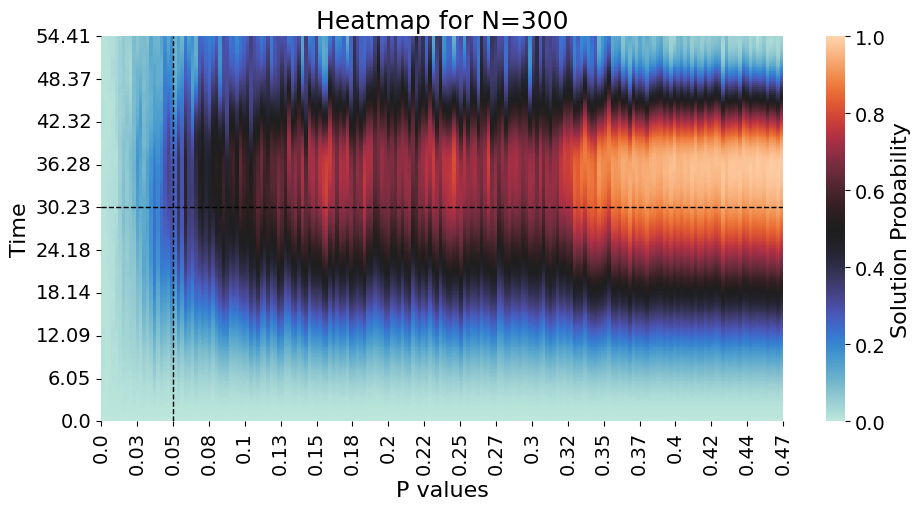

In [93]:
def plot_heatmap(p_values, t_values, prob_values, x_num_ticks=5, y_num_ticks=5, round_val=3, filepath=None, 
                 N=None, xlabel=None, ylabel=None, cbar_label=None, font_size=12, figsize=(8, 6), cmap='coolwarm',
                 x_vline_value=None, y_hline_value=None):
    
    flat_p = [item for sublist in p_values for item in sublist]
    flat_t = [item for sublist in t_values for item in sublist]
    flat_prob = [item for sublist in prob_values for item in sublist]
    data = {'p': flat_p, 't': flat_t, 'prob': flat_prob}
    df = pd.DataFrame(data)
    pivot = df.pivot('t', 'p', 'prob')
    
    fig, ax = plt.subplots(figsize=figsize) 
    sns.heatmap(pivot, cmap=cmap, vmin=0, vmax=1, cbar_kws={'label': cbar_label}, linewidths=0)

    # set customizations
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=font_size)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=font_size)
    cbar.ax.set_ylabel(cbar_label, fontsize=font_size + 2)

    # generate tick labels based on p and t values
    num_p_ticks = min(x_num_ticks, len(p_values[0]))
    num_t_ticks = min(y_num_ticks, len(t_values[0]))
    p_tick_labels = np.round(np.linspace(min(flat_p), max(flat_p), num_p_ticks), round_val)
    t_tick_labels = np.round(np.linspace(min(flat_t), max(flat_t), num_t_ticks), round_val)

    # set x and y tick labels
    ax.set_xticks(np.linspace(0, len(p_values[0]), num_p_ticks))
    ax.set_yticks(np.linspace(0, len(t_values[0]), num_t_ticks))
    ax.set_xticklabels(p_tick_labels)
    ax.set_yticklabels(t_tick_labels)
    
    # find closest x and y tick values
    if x_vline_value is not None:
        x_idx = np.abs(np.array(p_tick_labels) - x_vline_value).argmin()
        x_tick_value = ax.get_xticks()[x_idx]
        ax.axvline(x=x_tick_value, linestyle='--', linewidth=1, color='black')
    if y_hline_value is not None:
        y_idx = np.abs(np.array(t_tick_labels) - y_hline_value).argmin()
        y_tick_value = ax.get_yticks()[y_idx]
        ax.axhline(y=y_tick_value, linestyle='--', linewidth=1, color='black')

    # add title to the plot if N is provided
    if N is not None:
        plt.title(f'Heatmap for N={N}', fontsize=font_size + 4)

    # add x and y axis labels
    if xlabel is not None:
        ax.set_xlabel(xlabel, fontsize=font_size + 2)
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=font_size + 2)
        
    if filepath is not None:
        plt.savefig(filepath, bbox_inches='tight')
        plt.show()
    else:
        plt.show()


N = 300
p = math.log(N,3/2)/N
t = np.pi/2 * sqrt(N)

x_num_ticks = 20
y_num_ticks = 10
round_val = 2

xlabel = 'P values'
ylabel = 'Time'
cbar_label='Solution Probability'

font_size = 14
figsize = (11, 5)
# colormap = "magma"
# colormap = "vlag"
# colormap = sns.diverging_palette(220, 20, as_cmap=True)
colormap = sns.color_palette("icefire", as_cmap=True)
x_vline_value = p
y_vline_value = t

print(p)
print(t)
heatMapPlotFile = f'Output/ERSearch/heatMapPlot_N{N}_NGRAPHS{numberOfWalks}_S{samples}.png'
plot_heatmap(p_values=x, t_values=y, prob_values=z, x_num_ticks=x_num_ticks, y_num_ticks=y_num_ticks, round_val=round_val, filepath=heatMapPlotFile,
             N=N, xlabel = xlabel, ylabel=ylabel, cbar_label=cbar_label, font_size = font_size, figsize=figsize, cmap = colormap,
             x_vline_value=p, y_hline_value=y_vline_value)